# Importing important libraries and data

In [1]:
# Import the libraries
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Read the csv file
data = pd.read_excel('E:/Imarticus/Machine learning/Datasets/Unsupervised Learning/Time Series/Sample - Superstore.xls')

In [3]:
# Looking at the first five rows
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Let's check the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

As we can see, we have 9994 records and 21 attributes

In [5]:
# check shape of data
data.shape

(9994, 21)

# Data Preprocessing

In [6]:
# Let's look at furniture sales only
furniture = data.loc[data['Category'] == 'Furniture']

In [7]:
# min date in dataset
furniture['Order Date'].min() 

Timestamp('2014-01-06 00:00:00')

In [8]:
# max date in dataset
furniture['Order Date'].max() 

Timestamp('2017-12-30 00:00:00')

In [9]:
# Save the unwanted columns into variable cols
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name','Segment','Country',
       'City','State','Postal Code','Region','Product ID','Category','Sub-Category',
       'Product Name','Quantity','Discount','Profit']

In [10]:
# Drop unwanted columns
furniture.drop(cols, axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
# looking at first five rows
furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840


In [12]:
# sort the data by order date
furniture.sort_values('Order Date')
# check for null values
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [13]:
# sum of sales by order date
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [14]:
# set 'order date' as index
furniture = furniture.set_index('Order Date') #indexing with time series data

In [15]:
# loking at the first five indexes
furniture.index[0:5]

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13'],
              dtype='datetime64[ns]', name='Order Date', freq=None)

In [16]:
# average the daily sales value for each month
# use start of each month as time stamp
y = furniture['Sales'].resample('MS').mean()

In [17]:
# looking at first ten average sales value per each month
y.head(10)

Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049187
2014-06-01    695.059242
2014-07-01    601.169500
2014-08-01    457.521656
2014-09-01    992.353367
2014-10-01    769.015437
Freq: MS, Name: Sales, dtype: float64

In [18]:
# looking at average sales value per each month form 2017 onwards
y['2017':][0:5]

Order Date
2017-01-01    397.602133
2017-02-01    528.179800
2017-03-01    544.672240
2017-04-01    453.297905
2017-05-01    678.302328
Freq: MS, Name: Sales, dtype: float64

# Data visualization

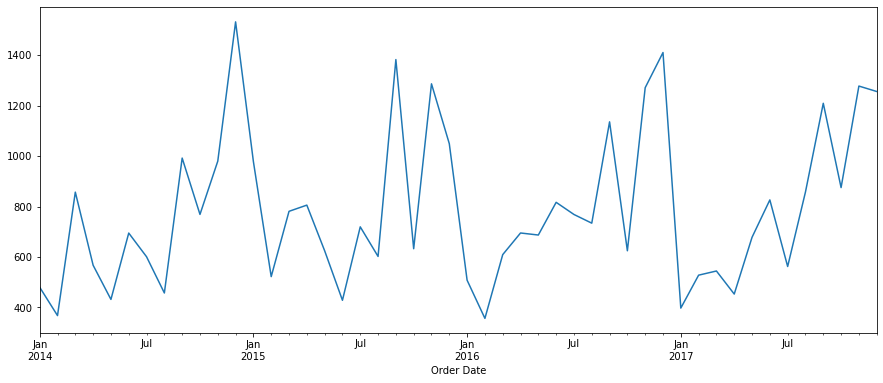

In [19]:
# data visualization
y.plot(figsize=(15,6))
plt.show()

Observation:

As we can see data is normally distributed, sales increases sometimes and decreases sometimes

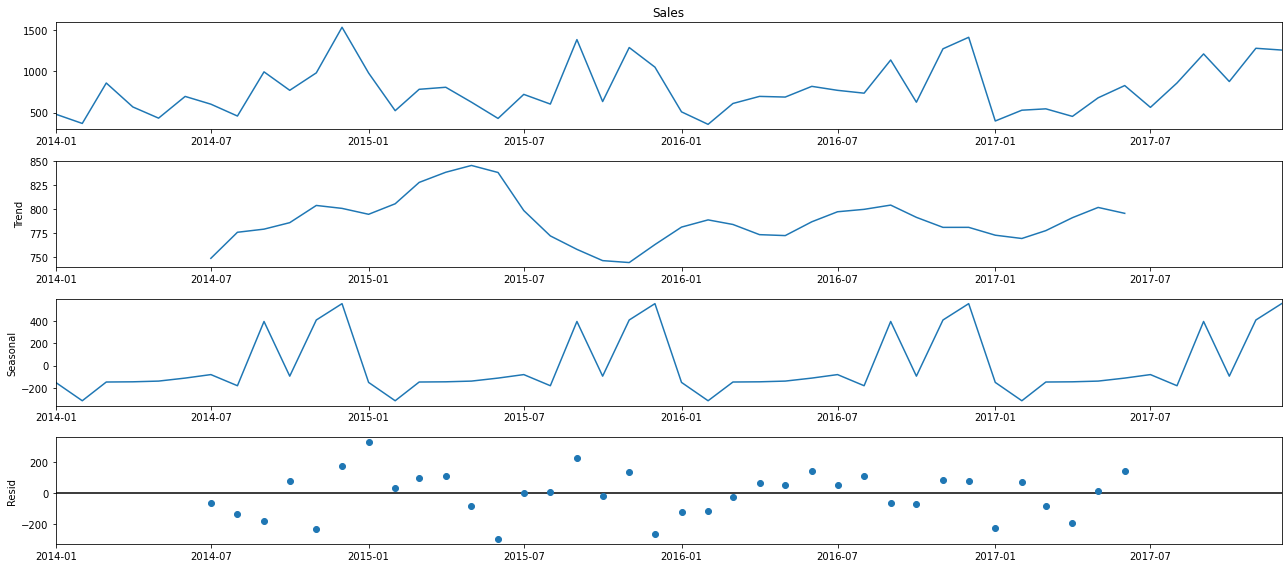

In [21]:
# decompose the time series into three components like Trend, Seasonality, Noise
from pylab import rcParams
rcParams['figure.figsize'] = 18,8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Obseravtions:

- from july 2014 to july 2015 the trend is upward, then trend is downward till Nov 2015 , then trend is upward 
- As we can see our data is having some seasonality

# Model Building and Evaluation

In [22]:
#time series forecasting model using ARIMA
import itertools
p = d = q = range(0,2)

# take all possible combinations of p, d and q 
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))] # list comprehendion

In [23]:
print('Example of parameter combinations for seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[3], seasonal_pdq[3]))

Example of parameter combinations for seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)


In [24]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [25]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [26]:
# Using grid search to find the optimal set of paramters that yeilds the best performance 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,
                                         enforce_stationarity=False,enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA {} X {} 12 - AIC {}'.format(param,param_seasonal,results.aic))
        except:
                continue

ARIMA (0, 0, 0) X (0, 0, 0, 12) 12 - AIC 769.0817523205915
ARIMA (0, 0, 0) X (0, 0, 1, 12) 12 - AIC 1462.5309065130248
ARIMA (0, 0, 0) X (0, 1, 0, 12) 12 - AIC 477.7170130920217

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



ARIMA (0, 0, 0) X (0, 1, 1, 12) 12 - AIC 302.27028997938197
ARIMA (0, 0, 0) X (1, 0, 0, 12) 12 - AIC 497.2314433418337


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 0, 0) X (1, 0, 1, 12) 12 - AIC 1031.442604642095
ARIMA (0, 0, 0) X (1, 1, 0, 12) 12 - AIC 318.0047199116341
ARIMA (0, 0, 0) X (1, 1, 1, 12) 12 - AIC 304.2488280301906
ARIMA (0, 0, 1) X (0, 0, 0, 12) 12 - AIC 720.9252270758091
ARIMA (0, 0, 1) X (0, 0, 1, 12) 12 - AIC 2636.6757854210564
ARIMA (0, 0, 1) X (0, 1, 0, 12) 12 - AIC 466.56074298091625


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 0, 1) X (0, 1, 1, 12) 12 - AIC 291.6261389673291
ARIMA (0, 0, 1) X (1, 0, 0, 12) 12 - AIC 499.5411265977082


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 0, 1) X (1, 0, 1, 12) 12 - AIC 2173.6474817686394
ARIMA (0, 0, 1) X (1, 1, 0, 12) 12 - AIC 319.9884876946871
ARIMA (0, 0, 1) X (1, 1, 1, 12) 12 - AIC 291.87255774343737
ARIMA (0, 1, 0) X (0, 0, 0, 12) 12 - AIC 677.894766843944


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 1, 0) X (0, 0, 1, 12) 12 - AIC 1458.789040296794
ARIMA (0, 1, 0) X (0, 1, 0, 12) 12 - AIC 486.63785671879367
ARIMA (0, 1, 0) X (0, 1, 1, 12) 12 - AIC 304.96712281679527
ARIMA (0, 1, 0) X (1, 0, 0, 12) 12 - AIC 497.78896630044073


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 1, 0) X (1, 0, 1, 12) 12 - AIC 1264.9871960797057
ARIMA (0, 1, 0) X (1, 1, 0, 12) 12 - AIC 319.7714068109211
ARIMA (0, 1, 0) X (1, 1, 1, 12) 12 - AIC 306.911320015144
ARIMA (0, 1, 1) X (0, 0, 0, 12) 12 - AIC 649.9056176817146
ARIMA (0, 1, 1) X (0, 0, 1, 12) 12 - AIC 2492.73247291323


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 1, 1) X (0, 1, 0, 12) 12 - AIC 458.87055484825856
ARIMA (0, 1, 1) X (0, 1, 1, 12) 12 - AIC 279.58062333927444
ARIMA (0, 1, 1) X (1, 0, 0, 12) 12 - AIC 486.18329774427036


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 1, 1) X (1, 0, 1, 12) 12 - AIC 2047.1328886544325
ARIMA (0, 1, 1) X (1, 1, 0, 12) 12 - AIC 310.75743684173153
ARIMA (0, 1, 1) X (1, 1, 1, 12) 12 - AIC 281.55766214612447
ARIMA (1, 0, 0) X (0, 0, 0, 12) 12 - AIC 692.1645522067713


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 0, 0) X (0, 0, 1, 12) 12 - AIC 1486.4586144028292
ARIMA (1, 0, 0) X (0, 1, 0, 12) 12 - AIC 479.46321478521355
ARIMA (1, 0, 0) X (0, 1, 1, 12) 12 - AIC 304.20776751609577
ARIMA (1, 0, 0) X (1, 0, 0, 12) 12 - AIC 480.92593679351955


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 0, 0) X (1, 0, 1, 12) 12 - AIC 975.8887054708347
ARIMA (1, 0, 0) X (1, 1, 0, 12) 12 - AIC 304.46646750845605
ARIMA (1, 0, 0) X (1, 1, 1, 12) 12 - AIC 304.5842692143804
ARIMA (1, 0, 1) X (0, 0, 0, 12) 12 - AIC 665.7794442186671
ARIMA (1, 0, 1) X (0, 0, 1, 12) 12 - AIC 2639.4109782721007

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



ARIMA (1, 0, 1) X (0, 1, 0, 12) 12 - AIC 468.3685195815059
ARIMA (1, 0, 1) X (0, 1, 1, 12) 12 - AIC 293.342219396591
ARIMA (1, 0, 1) X (1, 0, 0, 12) 12 - AIC 482.5763323876944


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 0, 1) X (1, 0, 1, 12) 12 - AIC 2054.387287316011
ARIMA (1, 0, 1) X (1, 1, 0, 12) 12 - AIC 306.015600212433
ARIMA (1, 0, 1) X (1, 1, 1, 12) 12 - AIC 293.7513188131966
ARIMA (1, 1, 0) X (0, 0, 0, 12) 12 - AIC 671.2513547541902


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 1, 0) X (0, 0, 1, 12) 12 - AIC 1365.4982545403013
ARIMA (1, 1, 0) X (0, 1, 0, 12) 12 - AIC 479.2003422281134
ARIMA (1, 1, 0) X (0, 1, 1, 12) 12 - AIC 300.21306116190993
ARIMA (1, 1, 0) X (1, 0, 0, 12) 12 - AIC 475.3403658784461


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 1, 0) X (1, 0, 1, 12) 12 - AIC 1008.9670491036487
ARIMA (1, 1, 0) X (1, 1, 0, 12) 12 - AIC 300.6270901345416
ARIMA (1, 1, 0) X (1, 1, 1, 12) 12 - AIC 302.326499250379
ARIMA (1, 1, 1) X (0, 0, 0, 12) 12 - AIC 649.0318019835378
ARIMA (1, 1, 1) X (0, 0, 1, 12) 12 - AIC 455.036418845096

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



ARIMA (1, 1, 1) X (0, 1, 0, 12) 12 - AIC 460.47626876107915
ARIMA (1, 1, 1) X (0, 1, 1, 12) 12 - AIC 281.38730069393625
ARIMA (1, 1, 1) X (1, 0, 0, 12) 12 - AIC 469.5250354660885


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 1, 1) X (1, 0, 1, 12) 12 - AIC 300.2848235058095
ARIMA (1, 1, 1) X (1, 1, 0, 12) 12 - AIC 297.78754395458174
ARIMA (1, 1, 1) X (1, 1, 1, 12) 12 - AIC 283.36610143879193


In [27]:
# ARIMA {0, 1, 1} x {0, 1, 1, 12} hyperparameter combination giving the best results with min AIC of 279.58
# fitting the ARIMA model
mod = sm.tsa.statespace.SARIMAX(y, order=(0,1,1), seasonal_order=(0,1,1,12),enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   1058.401     -0.001      0.999   -2075.428    2073.428
ma.S.L12      -1.0001   1058.466     -0.001      0.999   -2075.556    2073.555
sigma2      2.686e+04      0.002   1.62e+07      0.000    2.69e+04    2.69e+04


In [28]:
results

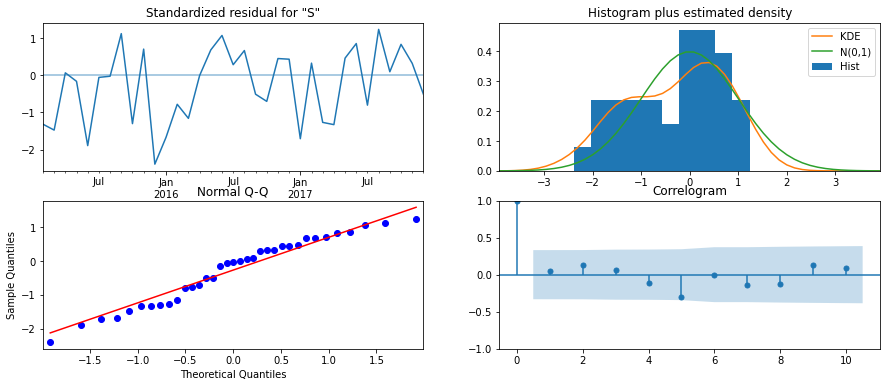

In [29]:
# Running model diagonostics using graph
results.plot_diagnostics(figsize = (15,6))
plt.show()

Our model diagnostics suggests that the model residuals are nearly normally distributed

In [30]:
# build validated forecasts and we set forecasts to start at '2017-01-01' to the end of the data
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic=False)

In [31]:
pred

In [32]:
pred_ci = pred.conf_int() # getting confidence interval for furniture sales

In [33]:
# comparing predicted sales to real sales of the time series 
pred_ci

,lower Sales,upper Sales
Order Date,,
2017-01-01,346.956915,1131.839446
2017-02-01,72.635342,852.882077
2017-03-01,407.490478,1183.861491
2017-04-01,328.638287,1101.817179
2017-05-01,201.898422,972.405274
2017-06-01,274.530056,1042.767463
2017-07-01,336.391374,1102.677297
2017-08-01,234.085023,998.674959
2017-09-01,809.153955,1572.256312


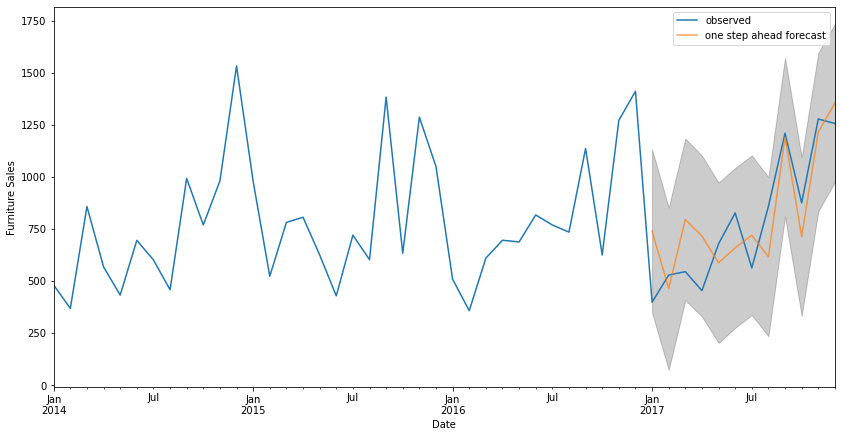

In [34]:
# Visualizing the forecasting
ax = y['2014':].plot(label = 'observed')
pred.predicted_mean.plot(ax=ax, label='one step ahead forecast', alpha=0.7, figsize = (14,7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k',alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall our forecasts align with the true values very well, showing an upward trend starts from beginning of year and captured the seasonality toward the end of the year. 

In [35]:
# Error analysis 
y_hat = pred.predicted_mean
y_truth = y['2017-01-01':]

mse =((y_hat - y_truth)**2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse,2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse,2)))


The Mean Squared Error of our forecasts is 34370.12
The Root Mean Squared Error of our forecasts is 185.39
